In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import VimeoVideo

In [4]:
df = pd.read_csv("/content/mexico_real_estate_clean.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  1736 non-null   object 
 1   state          1736 non-null   object 
 2   lat            1736 non-null   float64
 3   lon            1736 non-null   float64
 4   area_m2        1736 non-null   int64  
 5   price_usd      1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [7]:
# Use plotly express to create figure
fig = px.scatter_mapbox(
    df,  # Our DataFrame
    lat="lat",
    lon="lon",
    center={"lat": 19.43, "lon": -99.13},  # Map will be centered on Mexico City
    width=600,  # Width of map
    height=600,  # Height of map
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)

# Add mapbox_style to figure layout
fig.update_layout(mapbox_style="open-street-map")

# Show figure
fig.show()

In [9]:
# Get value counts of "state" column
df["state"].head(10)
df["state"].value_counts()

,count
state,
Distrito Federal,303
Estado de México,179
Yucatán,171
Morelos,160
Querétaro,128
Veracruz de Ignacio de la Llave,117
Puebla,95
Nuevo León,83
Jalisco,60


In [10]:
# Describe "area_m2", "price_usd" columns
df[["area_m2", "price_usd"]].describe()

,area_m2,price_usd
count,1736.000000,1736.000000
mean,170.261521,115331.980766
std,80.594539,65426.173873
min,60.000000,33157.890000
25%,101.750000,65789.470000
50%,156.000000,99262.130000
75%,220.000000,150846.665000
max,385.000000,326733.660000


Text(0.5, 1.0, 'Distribution of Home Sizes')

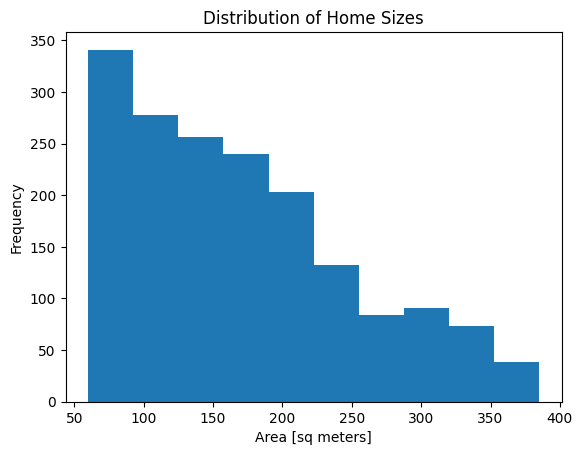

In [11]:
# Use Matplotlib to create histogram of "area_m2"
plt.hist(df["area_m2"]);
# Add x-axis label
plt.xlabel("Area [sq meters]")
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Sizes")

Text(0.5, 1.0, 'Distribution of Home Sizes')

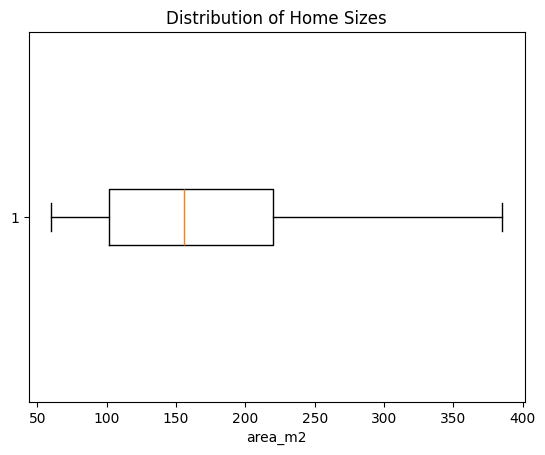

In [12]:
# Use Matplotlib to create boxplot of "area_m2"
plt.boxplot(df["area_m2"], vert= False);
# Add x-axis label
plt.xlabel("area_m2")
# Add title
plt.title("Distribution of Home Sizes")

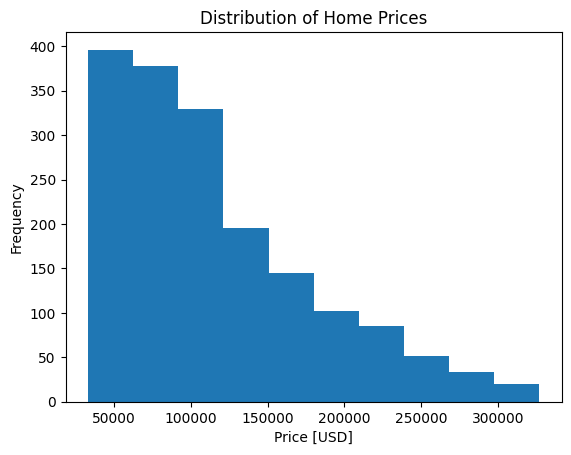

In [13]:
# Use Matplotlib to create histogram of "price_usd"
plt.hist(df["price_usd"])
# Add x-axis label
plt.xlabel("Price [USD]")
# Add y-axis label
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices");

Text(0.5, 1.0, 'Distribution of Home Prices')

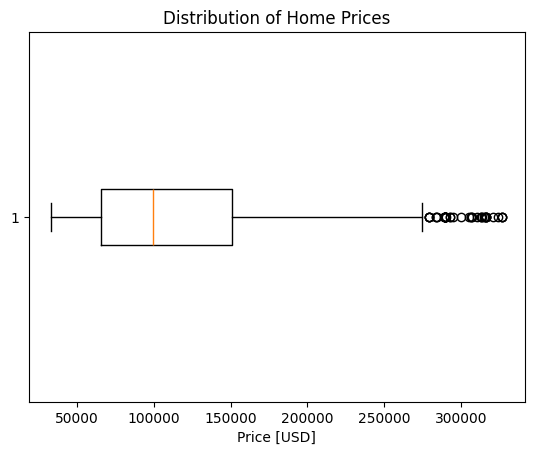

In [15]:
# Use Matplotlib to create boxplot of "price_usd"
plt.boxplot(df["price_usd"] , vert= False)
# Add x-label axis
plt.xlabel("Price [USD]")
# Add y-label axis
plt.title("Distribution of Home Prices")

In [16]:
# Declare variable `mean_price_by_state`
mean_price_by_state = df.groupby("state")["price_usd"].mean().sort_values(ascending = False)
mean_price_by_state

,price_usd
state,
Querétaro,133955.913281
Guanajuato,133277.965833
Nuevo León,129221.985663
Distrito Federal,128347.267426
Quintana Roo,128065.416053
Chihuahua,127073.852000
Jalisco,123386.472167
Estado de México,122723.490503
Campeche,121734.633333


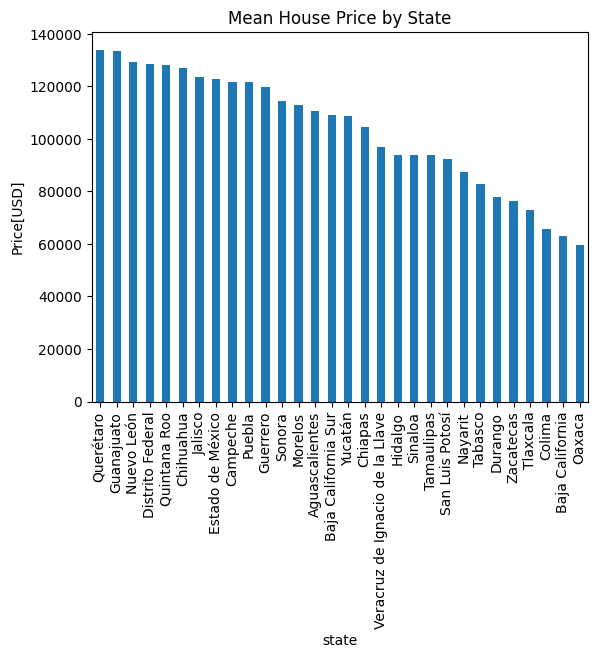

In [17]:
# Create bar chart from `mean_price_by_state` using pandas
mean_price_by_state.plot(kind="bar", xlabel="state",ylabel="Price[USD]",title="Mean House Price by State");

In [18]:
# Create "price_per_m2" column
df["price_per_m2"] = df["price_usd"]/ df["area_m2"]
df.head()

,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634


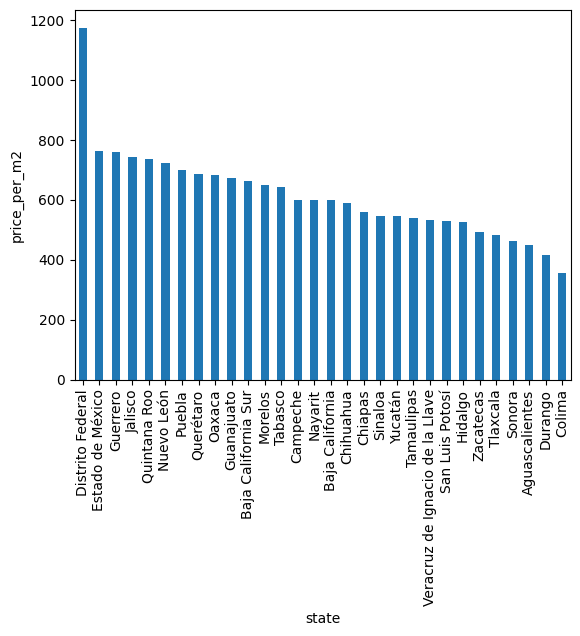

In [19]:
# Group `df` by "state", create bar chart of "price_per_m2"
df.groupby("state")["price_per_m2"].mean().sort_values(ascending= False).plot(kind="bar", xlabel="state", ylabel="price_per_m2");

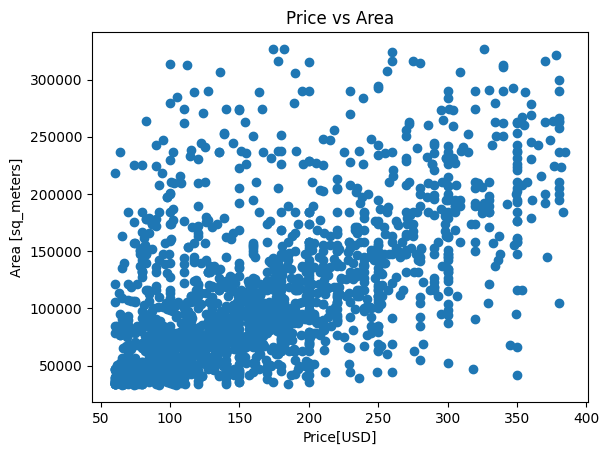

In [20]:
# Create scatter plot of "price_usd" vs "area_m2"
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("Price[USD]")
plt.ylabel("Area [sq_meters]")
plt.title("Price vs Area");

In [21]:
# Calculate correlation of "price_usd" and "area_m2"
p_correlation = df["area_m2"].corr(df["price_usd"])

# Print correlation coefficient
print(p_correlation)

0.585518245323206


In [22]:
# Declare variable `df_morelos` by subsetting `df`
df_morelos = df[df["state"] == "Morelos"]

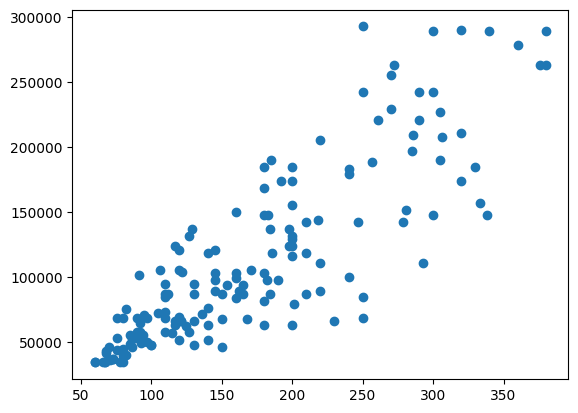

In [23]:
# Create scatter plot of "price_usd" vs "area_m2" in Morelos
plt.scatter(x= df_morelos["area_m2"], y=df_morelos["price_usd"])
# Add x-axis label
plt.xlabel= ["Ärea[sq_meters]"]
# Add y-axis label
plt.ylabel=["Price_usd"]
# Add title
plt.title=["Price vs Area"]

In [24]:
# Calculate correlation of "price_usd" and "area_m2" in `df_morelos`
p_correlation = df_morelos["price_usd"].corr (df_morelos["area_m2"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Morelos):", p_correlation)

Correlation of 'area_m2' and 'price_usd' (Morelos): 0.8498077608713707


Correlation of 'area_m2' and 'price_usd' (Mexico City): 0.41070392130717864


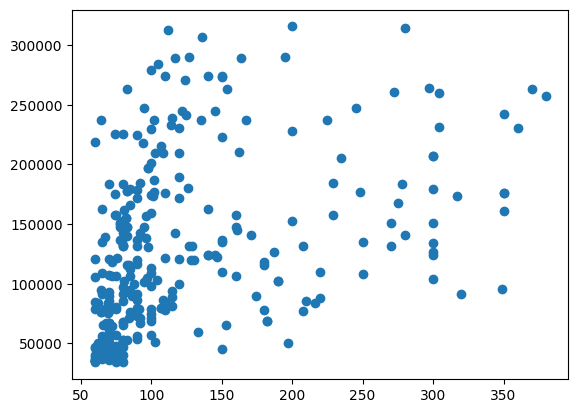

In [25]:
# Declare variable `df_mexico_city` by subsetting `df`
df_mexico_city = df[df["state"] == "Distrito Federal"]

# Create a scatter plot "price_usd" vs "area_m2" in Distrito Federal
plt.scatter(x= df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])

# Add x-axis label
plt.xlabel=("Ärea[sq_meters]")

# Add y-axis label
plt.ylabel= ("Price_usd")

# Add title
plt.title= ("Mexico City: Price vs. Area");

# Calculate correlation of "price_usd" and "area_m2" in `df_mexico_city`
p_correlation = df_mexico_city["price_usd"].corr (df_mexico_city["area_m2"])

# Print correlation coefficient
print("Correlation of 'area_m2' and 'price_usd' (Mexico City):", p_correlation)